# Marijuana arrests in the District of Columbia

**The *primary objective* of the project was to discover patterns and investigate individual-specific and offense-specific data concerning the individuals who have been arrested.**


**Description of the DATA**

In the District of Columbia, the laws related to the recreational use and possession of marijuana have changed at two milestones: the effective dates of the Marijuana Possession Decriminalization Amendment Act of 2014 on July 17, 2014, and of Initiative 71 on February 26, 2015 (https://mpdc.dc.gov/marijuana). Due to privacy considerations, exact CCNs and arrest numbers for these arrest datasets are not provided. In lieu, hash numbers are provided for CNN which allows individuals to determine whether there are multiple arrests associated with one event. Additionally, arrest numbers can be linked directly to an individual and therefore DC government does not provide this more generally, but again as hash numbers.

This data includes arrests made by the Metropolitan Police Department (MPD). The data represents individuals arrested with a marijuana charge, regardless of whether there was a more serious secondary charge. If an arrestee was charged with multiple marijuana charges, the arrest is only counted once under the more serious charge type (Distribution > Possession with Intent to Distribute > Possession > Public Consumption).

MPD collects race and ethnicity data according to the United States Census Bureau standards (https://www.census.gov/topics/population/race/about.html). Hispanic, which was previously categorized under the Race field prior to August 2015, is now captured under Ethnicity. All records prior to August 2015 have been updated to “Unknown (Race), Hispanic (Ethnicity)”. Race and ethnicity data are based on officer observation, which may or may not be accurate.

MPD cannot release exact addresses to the general public unless proof of ownership or subpoena is submitted. The GeoX and GeoY values represent the block location (approximately 232 ft. radius) as of the date of the arrest. Due to the Department’s redistricting efforts in 2012 and 2017, data may not be comparable in some years.

Arrestee age is calculated based on the number of days between the self-reported or verified date of birth (DOB) of the arrestee and the date of the arrest; DOB data may not be accurate if selfreported or if the arrestee refused to provide it.

Due to the sensitive nature of juvenile data and to protect the arrestee’s confidentiality, any arrest records for defendants under the age of 18 have been coded as “Juvenile” for the following fields:

• Arrest Time

• CCN

• Age

• Offense Location Block GeoX/Y

• Defendant Race

• Defendant Ethnicity

• Defendant Sex

• Arrest Location Block Address

• Arrest Location Block GeoX/Y

This data may not match other marijuana data requests that may have included all law enforcement agencies in the District, or only the most serious charge. Figures are subject to change due to record sealing, expungements, and data quality audits.

###### DOCUMENTATION: https://www.kaggle.com/datasets/utkarshx27/marijuana-arrests-in-columbia

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('Marijuana_Arrests.csv')
df.head()

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,OFFENSE_BLOCKX,OFFENSE_BLOCKY,...,ADDRESS,ARREST_BLOCKX,ARREST_BLOCKY,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,GLOBALID
0,Possession,Adult,2012,2012/01/01 06:00:00+00,b';\xc8k~\xa4iJ',20.0,5D,501.0,399700.0,137900.0,...,FLORIDA AVE NE,401400.0,136900.0,MARIJUANA_ARRESTS_1,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12481,{4654D30A-5B56-4E19-8FC2-B19CC723C747}
1,Possession,Adult,2012,2012/01/01 06:00:00+00,b';\xc8k~\xa4iJ',23.0,5D,501.0,399700.0,137900.0,...,FLORIDA AVE NE,401400.0,136900.0,MARIJUANA_ARRESTS_2,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12482,{1C0EBA86-27EC-4B8E-8ABB-6EFFF03A0AA2}
2,Possession,Adult,2012,2012/01/01 06:00:00+00,b't6\xa0\xac\xec`\xa4',46.0,7D,707.0,399700.0,130600.0,...,3300 BLOCK OF BROTHERS PL SE,399700.0,130600.0,MARIJUANA_ARRESTS_3,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12483,{88080D68-CFA3-41E6-AA69-5DB7F950A134}
3,Possession,Adult,2012,2012/01/01 09:35:00+00,b'\xbe\x1d\xa7\xf5\xffWx',30.0,6D,605.0,403300.0,134500.0,...,700 BLOCK OF 32ND ST SE,NaN,NaN,MARIJUANA_ARRESTS_4,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12484,{7769980A-5F36-4B3C-91CF-D1A3A94CE52E}
4,Possession with intent to distribute,Adult,2012,2012/01/02 19:40:00+00,b'\xbb\xc0\x8e\x94\x81\xac\xcd',29.0,6D,604.0,406400.0,135300.0,...,5300 BLOCK OF B ST SE,NaN,NaN,MARIJUANA_ARRESTS_5,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12485,{5D5BEE85-DF16-41A1-BB49-0D16D0EE1320}


## DATA CLEANING

### *Missing Data*

We do not require the technical details. We will remove the final 12 columns.

In [3]:
df = df.drop(['OBJECTID','CREATOR','CREATED','EDITOR','EDITED','GLOBALID','GIS_ID','CATEGORY','OFFENSE_BLOCKX','OFFENSE_BLOCKY','ARREST_BLOCKX','ARREST_BLOCKY'],axis=1)
df.head()

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,DESCRIPTION,ADDRESS
0,Possession,Adult,2012,2012/01/01 06:00:00+00,b';\xc8k~\xa4iJ',20.0,5D,501.0,Out of State,Out of State,B,N,F,Ucsa Possession Marijuana,FLORIDA AVE NE
1,Possession,Adult,2012,2012/01/01 06:00:00+00,b';\xc8k~\xa4iJ',23.0,5D,501.0,Out of State,Out of State,B,N,M,Ucsa Possession Marijuana,FLORIDA AVE NE
2,Possession,Adult,2012,2012/01/01 06:00:00+00,b't6\xa0\xac\xec`\xa4',46.0,7D,707.0,705,7D,B,N,M,Ucsa Possession Marijuana,3300 BLOCK OF BROTHERS PL SE
3,Possession,Adult,2012,2012/01/01 09:35:00+00,b'\xbe\x1d\xa7\xf5\xffWx',30.0,6D,605.0,605,6D,B,U,M,Ucsa Possession Marijuana,700 BLOCK OF 32ND ST SE
4,Possession with intent to distribute,Adult,2012,2012/01/02 19:40:00+00,b'\xbb\xc0\x8e\x94\x81\xac\xcd',29.0,6D,604.0,NaN,NaN,U,U,M,Ucsa Pwid Marijuana,5300 BLOCK OF B ST SE


Evaluating the amount of missing data (NaN) in our dataset. At least one missing value was found in 1,343 rows.

In [4]:
df[df.isna().any(axis=1)]

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,DESCRIPTION,ADDRESS
4,Possession with intent to distribute,Adult,2012,2012/01/02 19:40:00+00,b'\xbb\xc0\x8e\x94\x81\xac\xcd',29.0,6D,604.0,NaN,NaN,U,U,M,Ucsa Pwid Marijuana,5300 BLOCK OF B ST SE
11,Possession,Adult,2012,2012/01/04 04:15:00+00,b'\x8f.\xc0.\x99\\\xca',43.0,4D,403.0,NaN,NaN,U,U,M,Ucsa Possession Marijuana,5400 BLOCK OF GEORGIA AVE NW
38,Possession,Adult,2012,2012/01/06 01:36:00+00,b'J\x877\x89!\xa6\xf9',29.0,3D,304.0,NaN,NaN,W,N,M,Ucsa Possession Marijuana,GEORGIA AVE NW
42,Possession with intent to distribute,Juvenile,2012,2012/01/05 05:00:00+00,NaN,NaN,7D,701.0,608,6D,NaN,NaN,NaN,Ucsa Pwid Marijuana,NaN
56,Possession,Juvenile,2012,2012/01/06 05:00:00+00,NaN,NaN,3D,307.0,307,3D,NaN,NaN,NaN,Ucsa Possession Marijuana,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13058,Possession with intent to distribute,Juvenile,2021,2021/12/03 05:00:00+00,NaN,NaN,4D,403.0,Unknown,Unknown,NaN,NaN,NaN,Poss W/i To Dist Marijuana-misd,NaN
13059,Possession with intent to distribute,Juvenile,2021,2021/12/04 05:00:00+00,NaN,NaN,7D,702.0,702,7D,NaN,NaN,NaN,Poss W/i To Dist Marijuana-misd,NaN
13060,Public consumption,Juvenile,2021,2021/12/11 05:00:00+00,NaN,NaN,4D,403.0,503,5D,NaN,NaN,NaN,Consumption of marijuana in public space prohi...,NaN
13061,Possession,Juvenile,2021,2021/12/18 05:00:00+00,NaN,NaN,6D,608.0,405,4D,NaN,NaN,NaN,Poss Of A Controlled Substance -misd,NaN


We have over 10,000 complete data samples. We've chosen to remove all NaN values.

In [5]:
df = df.dropna(thresh=15).reset_index(drop=True)
df

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,DESCRIPTION,ADDRESS
0,Possession,Adult,2012,2012/01/01 06:00:00+00,b';\xc8k~\xa4iJ',20.0,5D,501.0,Out of State,Out of State,B,N,F,Ucsa Possession Marijuana,FLORIDA AVE NE
1,Possession,Adult,2012,2012/01/01 06:00:00+00,b';\xc8k~\xa4iJ',23.0,5D,501.0,Out of State,Out of State,B,N,M,Ucsa Possession Marijuana,FLORIDA AVE NE
2,Possession,Adult,2012,2012/01/01 06:00:00+00,b't6\xa0\xac\xec`\xa4',46.0,7D,707.0,705,7D,B,N,M,Ucsa Possession Marijuana,3300 BLOCK OF BROTHERS PL SE
3,Possession,Adult,2012,2012/01/01 09:35:00+00,b'\xbe\x1d\xa7\xf5\xffWx',30.0,6D,605.0,605,6D,B,U,M,Ucsa Possession Marijuana,700 BLOCK OF 32ND ST SE
4,Possession,Adult,2012,2012/01/02 21:47:00+00,b'\x94\xd2y\xaa\xf5\x1a\xcc',33.0,6D,604.0,301,3D,B,N,M,Ucsa Possession Marijuana,UNIT BLOCK OF 55TH ST SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11715,Possession with intent to distribute,Adult,2021,2021/12/06 21:00:00+00,105e0539b622e4c6,18.0,7D,706.0,708,7D,B,N,M,Poss W/i To Dist Marijuana-misd,3800 BLOCK OF 9TH STREET SE
11716,Possession with intent to distribute,Adult,2021,2021/12/23 21:00:00+00,14daeb983691273a,28.0,7D,708.0,708,7D,B,U,M,Poss W/i To Dist Marijuana-misd,4600 BLOCK OF MARTIN LUTHER KING JR AVENUE SW
11717,Possession with intent to distribute,Adult,2021,2021/12/23 21:00:00+00,14daeb983691273a,35.0,7D,708.0,706,7D,B,U,M,Poss W/i To Dist Marijuana-misd,4600 BLOCK OF MARTIN LUTHER KING JR AVENUE SW
11718,Possession with intent to distribute,Adult,2021,2021/04/26 11:00:00+00,f09f73792bd6d544,31.0,7D,701.0,701,7D,B,N,M,Poss W/i To Dist Marijuana-fel,2300 BLOCK OF GREEN STREET SE


Let's check another time. So, we do not have any missing values in our dataset:

In [6]:
df.isna().sum()

TYPE                  0
ADULT_JUVENILE        0
YEAR                  0
DATETIME              0
CCN                   0
AGE                   0
OFFENSE_DISTRICT      0
OFFENSE_PSA           0
DEFENDANT_PSA         0
DEFENDANT_DISTRICT    0
RACE                  0
ETHNICITY             0
SEX                   0
DESCRIPTION           0
ADDRESS               0
dtype: int64

### *Inconsist text or types*

Let's examine the categorical data:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11720 entries, 0 to 11719
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TYPE                11720 non-null  object 
 1   ADULT_JUVENILE      11720 non-null  object 
 2   YEAR                11720 non-null  int64  
 3   DATETIME            11720 non-null  object 
 4   CCN                 11720 non-null  object 
 5   AGE                 11720 non-null  float64
 6   OFFENSE_DISTRICT    11720 non-null  object 
 7   OFFENSE_PSA         11720 non-null  float64
 8   DEFENDANT_PSA       11720 non-null  object 
 9   DEFENDANT_DISTRICT  11720 non-null  object 
 10  RACE                11720 non-null  object 
 11  ETHNICITY           11720 non-null  object 
 12  SEX                 11720 non-null  object 
 13  DESCRIPTION         11720 non-null  object 
 14  ADDRESS             11720 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 1.3

As we can observe, there are 2 values for "Public Consumption" that are identical but differ in case (uppercase/lowercase). Let's standardize them:

In [8]:
df['TYPE'].value_counts()

Possession                              5457
Possession with intent to distribute    3619
Distribution                            1595
Public consumption                       826
Public Consumption                       219
Manufacture                                2
Cultivation                                2
Name: TYPE, dtype: int64

In [9]:
df.TYPE = np.where(df.TYPE=='Public Consumption','Public consumption',df.TYPE)
df['TYPE'].value_counts()

Possession                              5457
Possession with intent to distribute    3619
Distribution                            1595
Public consumption                      1045
Manufacture                                2
Cultivation                                2
Name: TYPE, dtype: int64

"Manufacture" and "Cultivation" represent types of offenses, which we will omit because there are only 4 specific cases.

In [10]:
df[df['TYPE'].isin(['Manufacture','Cultivation'])]

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,DESCRIPTION,ADDRESS
10545,Manufacture,Adult,2019,2019/03/20 22:25:00+00,b9f333f9054a6714,41.0,2D,203.0,203,2D,W,N,M,Manufacture Or Possessing W/intent To Manufact...,3000 BLOCK OF VAN NESS STREET NW
10708,Cultivation,Adult,2019,2019/05/29 22:50:00+00,efb222f3f71c5244,18.0,6D,603.0,603,6D,B,N,M,Manufacture Or Possessing W/intent To Manufact...,UNIT BLOCK OF RIDGE ROAD SE
11163,Manufacture,Adult,2020,2020/12/10 20:00:00+00,1240d752306d63ba,29.0,2D,204.0,204,2D,W,N,M,Manufacture Or Possessing W/intent To Manufact...,2300 BLOCK OF 41ST STREET NW
11558,Cultivation,Adult,2021,2021/11/10 01:00:00+00,46ee260ede6e4ee8,52.0,4D,401.0,401,4D,W,N,M,Cultivation Of A Controlled Substance,6600 BLOCK OF PINEY BRANCH ROAD NW


In [11]:
df.drop(index=[10545,10708,11163,11558],inplace=True)
df.reset_index(drop=True)
df[df['TYPE'].isin(['Manufacture','Cultivation'])]

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,DESCRIPTION,ADDRESS


As indicated in the data documentation, arrest records for defendants under the age of 18 have been coded and appear as NaN in the dataset. We removed them earlier, and now that we only have data for adults, we can also delete this column.

In [12]:
df.ADULT_JUVENILE.value_counts()

Adult    11716
Name: ADULT_JUVENILE, dtype: int64

In [13]:
df.drop('ADULT_JUVENILE',inplace = True,axis=1)
df.head()

,TYPE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,DESCRIPTION,ADDRESS
0,Possession,2012,2012/01/01 06:00:00+00,b';\xc8k~\xa4iJ',20.0,5D,501.0,Out of State,Out of State,B,N,F,Ucsa Possession Marijuana,FLORIDA AVE NE
1,Possession,2012,2012/01/01 06:00:00+00,b';\xc8k~\xa4iJ',23.0,5D,501.0,Out of State,Out of State,B,N,M,Ucsa Possession Marijuana,FLORIDA AVE NE
2,Possession,2012,2012/01/01 06:00:00+00,b't6\xa0\xac\xec`\xa4',46.0,7D,707.0,705,7D,B,N,M,Ucsa Possession Marijuana,3300 BLOCK OF BROTHERS PL SE
3,Possession,2012,2012/01/01 09:35:00+00,b'\xbe\x1d\xa7\xf5\xffWx',30.0,6D,605.0,605,6D,B,U,M,Ucsa Possession Marijuana,700 BLOCK OF 32ND ST SE
4,Possession,2012,2012/01/02 21:47:00+00,b'\x94\xd2y\xaa\xf5\x1a\xcc',33.0,6D,604.0,301,3D,B,N,M,Ucsa Possession Marijuana,UNIT BLOCK OF 55TH ST SE


The DATETIME column should be formatted as a datetime.

In [14]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df.DATETIME

0       2012-01-01 06:00:00+00:00
1       2012-01-01 06:00:00+00:00
2       2012-01-01 06:00:00+00:00
3       2012-01-01 09:35:00+00:00
4       2012-01-02 21:47:00+00:00
                   ...           
11715   2021-12-06 21:00:00+00:00
11716   2021-12-23 21:00:00+00:00
11717   2021-12-23 21:00:00+00:00
11718   2021-04-26 11:00:00+00:00
11719   2021-04-26 11:00:00+00:00
Name: DATETIME, Length: 11716, dtype: datetime64[ns, UTC]

We need to standardize the values in the Race column.

In [15]:
df.RACE.value_counts()

B     8273
B     2275
W      501
U      388
W      222
A       34
A       22
P        1
Name: RACE, dtype: int64

In [16]:
df['RACE'] = df['RACE'].str.replace('B ','B')
df['RACE'] = df['RACE'].str.replace('W ','W')
df['RACE'] = df['RACE'].str.replace('A ','A')
df['RACE'].unique()

array(['B', 'U', 'W', 'A', 'P'], dtype=object)

We have one instance with the 'P' race, which we assume is a human error.

In [17]:
df[df['RACE']=='P']

,TYPE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,DESCRIPTION,ADDRESS
9729,Public consumption,2018,2018-07-15 02:08:00+00:00,513e87d70061a9b58dcae0d926fca497,22.0,4D,408.0,408,4D,P,U,M,Consumption of marijuana in public space prohi...,1300 BLOCK OF OAK STREET NW


Let's change it on 'U' like Unknown:

In [18]:
df['RACE'] = np.where(df['RACE']=='P','U',df['RACE'])
df[df['RACE']=='P']

,TYPE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,DESCRIPTION,ADDRESS


We need unify Ethnicity values: 

In [19]:
df['ETHNICITY'].value_counts()

N     6195
U     2605
N     1832
U      648
H      342
H       94
Name: ETHNICITY, dtype: int64

In [20]:
df['ETHNICITY'] = df['ETHNICITY'].str.replace('N ','N')
df['ETHNICITY'] = df['ETHNICITY'].str.replace('U ','U')
df['ETHNICITY'] = df['ETHNICITY'].str.replace('H ','H')
df['ETHNICITY'].value_counts()

N    8027
U    3253
H     436
Name: ETHNICITY, dtype: int64

There are 12 instances with an unknown sex:

In [21]:
df['SEX'].value_counts()

M    10501
F     1203
U       12
Name: SEX, dtype: int64

Therefore, I assigned genders 'U' proportionally based on the entire sample of men and women.
    
    x/y = 1203/10501
    x+y = 12

In [22]:
round(1203/10501,2)

0.11

System of equations:

    x = 0.11*y
    x+y = 12

We can obtain an approximate result and use it:

    Male - 11
    Female - 1

In [23]:
df[df['SEX']=='U']['SEX']

2828     U
3686     U
4066     U
4073     U
5136     U
5576     U
5794     U
6540     U
6679     U
7144     U
8652     U
10695    U
Name: SEX, dtype: object

In [24]:
#change 1 value to 'F'
df.loc[2828,'SEX']='F'
#change 11 values to 'M'
df['SEX']=np.where(df['SEX']=='U','M',df['SEX'])

In [25]:
df['SEX'].value_counts()

M    10512
F     1204
Name: SEX, dtype: int64

Let's examine the numeric data. It's worth noting that OFFENSE_PSA and DEFENDANT_PSA are names of police offices, indicating that this data should be treated as categorical. 

In [26]:
df.describe()

,YEAR,AGE,OFFENSE_PSA
count,11716.000000,11716.000000,11716.000000
mean,2014.692984,29.495903,471.431547
std,2.728279,10.209729,189.610619
min,2012.000000,18.000000,101.000000
25%,2012.000000,22.000000,305.000000
50%,2014.000000,26.000000,506.000000
75%,2017.000000,34.000000,607.000000
max,2021.000000,81.000000,708.000000


Let's convert OFFENSE_PSA column to the str Pandas data type to ensure uniformity.

In [27]:
df['OFFENSE_PSA'] = df['OFFENSE_PSA'].astype('str')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11716 entries, 0 to 11719
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   TYPE                11716 non-null  object             
 1   YEAR                11716 non-null  int64              
 2   DATETIME            11716 non-null  datetime64[ns, UTC]
 3   CCN                 11716 non-null  object             
 4   AGE                 11716 non-null  float64            
 5   OFFENSE_DISTRICT    11716 non-null  object             
 6   OFFENSE_PSA         11716 non-null  object             
 7   DEFENDANT_PSA       11716 non-null  object             
 8   DEFENDANT_DISTRICT  11716 non-null  object             
 9   RACE                11716 non-null  object             
 10  ETHNICITY           11716 non-null  object             
 11  SEX                 11716 non-null  object             
 12  DESCRIPTION         11716 non-nu

## Exploratory Data Analysis

### 1). General characteristics

Let's begin by examining the distribution of arrests per year. As we can see, the number of arrests decreased after the change in the law in 2015.

In November 2014, District voters approved the Legalization of Possession of Minimal Amounts of Marijuana for Personal Use Initiative (commonly known as Initiative 71). The new law becomes effective on February 26, 2015.

As a result, it is legal for a person who is at least 21 years old to:

Possess two ounces or less of marijuana;
Transfer one ounce or less of marijuana to another person who is at least 21 years old, so long as there is no payment made or any other type of exchange of goods or services;
Cultivate within their residence up to six marijuana plants, no more than three of which are mature;
Possess marijuana-related drug paraphernalia – such as bongs, cigarette rolling papers, and cigar wrappers – that is associated with one ounce or less of marijuana; or
Use marijuana on private property.
What is still a criminal violation?
A person can still be arrested for:

Selling any amount of marijuana to another person;
Possessing more than two ounces of marijuana;
Operating a vehicle or boat under the influence of marijuana; or
Smoking, eating, or drinking marijuana – or holding or carrying a lighted roll of paper or other lighted smoking equipment filled with marijuana – in any public space, such as:
On any street, sidewalk, alley, park, or parking area;
In a vehicle on any street, alley, park, or parking area; or
Any place to which the public is invited.

<AxesSubplot:xlabel='YEAR', ylabel='count'>

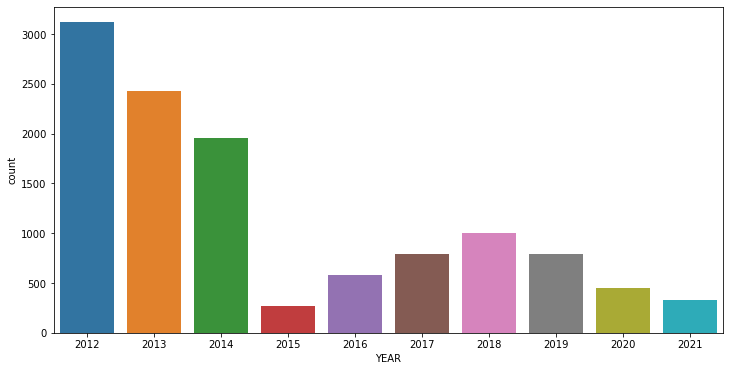

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['YEAR'],data = df)

The occurrence of "Possession with intent to distribute" offenses stayed the same before and after the law change, indicating no significant change in frequency. So, we can combine "Possession with intent to distribute" and "Distribution" types into a single category for the distribution analysis.

In [30]:
df['NEW_TYPES'] = np.where(df['TYPE']=='Possession with intent to distribute','Distribution',df['TYPE'])
df['NEW_TYPES'].value_counts()

Possession            5457
Distribution          5214
Public consumption    1045
Name: NEW_TYPES, dtype: int64

If we examine how the frequency of offenses changes after altering the law, we notice that the category of "Possession" decreases several times, while "Distribution" remains at a similar level.

<AxesSubplot:xlabel='YEAR', ylabel='count'>

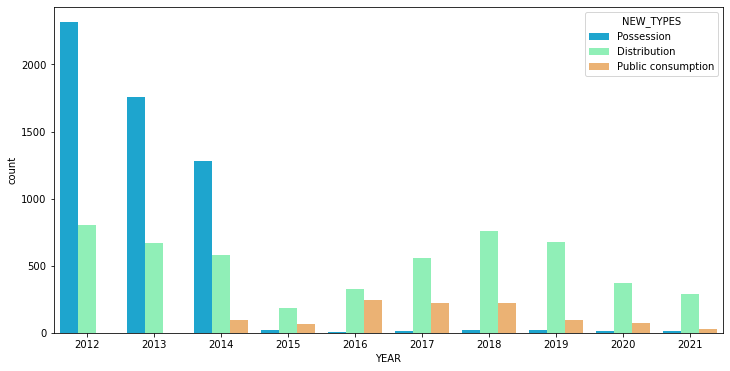

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='YEAR',data=df,hue='NEW_TYPES',palette='rainbow')

We can also identify the district with the highest number of offenses by type recorded. 

<AxesSubplot:xlabel='OFFENSE_DISTRICT', ylabel='count'>

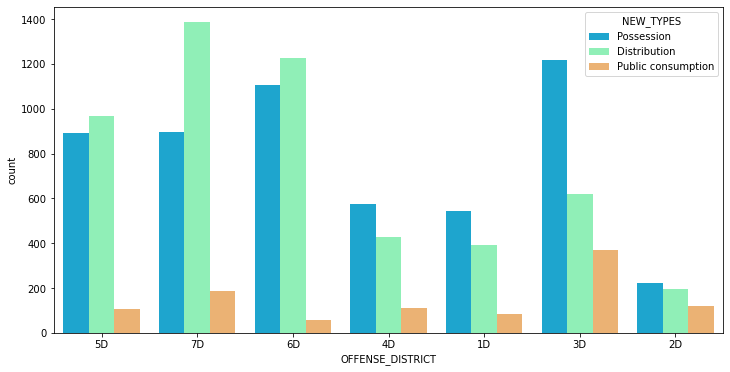

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x='OFFENSE_DISTRICT',data=df,hue='NEW_TYPES',palette='rainbow')

Let's examine the distribution among gender groups based on the new types:

<AxesSubplot:xlabel='NEW_TYPES', ylabel='AGE'>

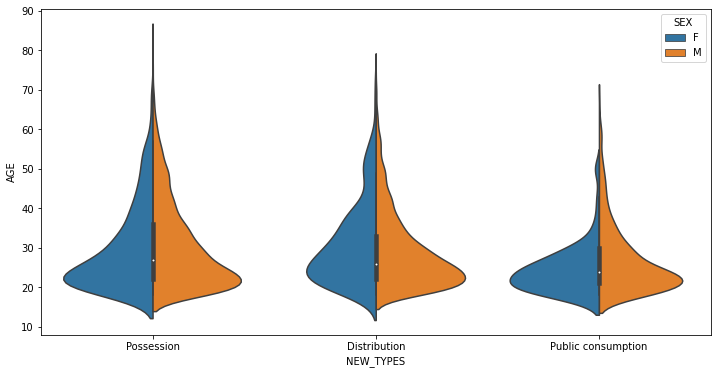

In [33]:
plt.figure(figsize=(12,6))
sns.violinplot(x='NEW_TYPES',y='AGE',hue='SEX',data=df,split=True)

Let's see race and gender specific:

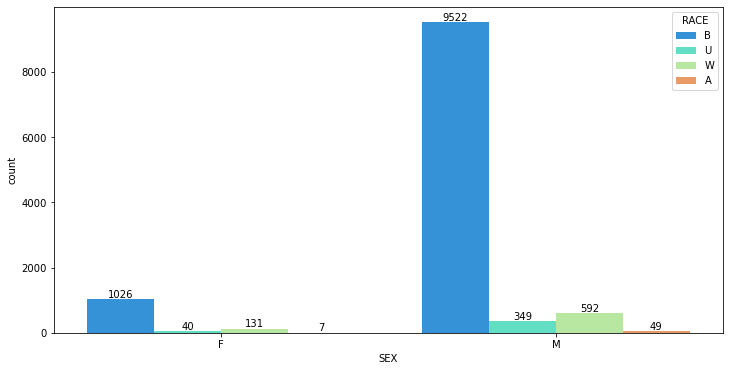

In [34]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='SEX',data=df,hue='RACE',palette='rainbow')

for container in ax.containers:
    ax.bar_label(container)

Examining the outcomes across various age groups is quite interesting.

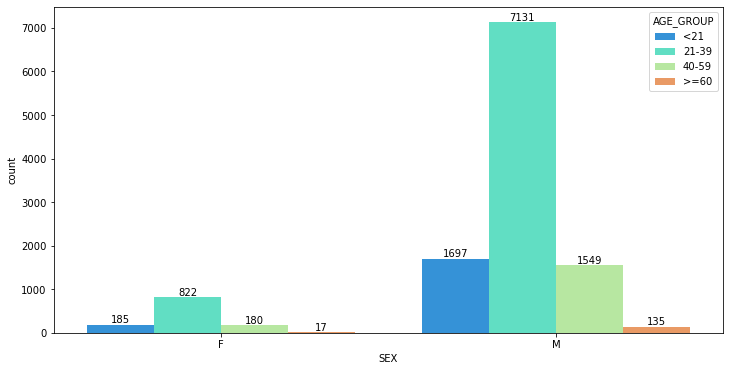

In [35]:
df['AGE_GROUP'] = df['AGE'].apply(lambda x: '<21' if x<21 else ('21-39' if x < 40 else ('40-59' if x <60 else '>=60')))


plt.figure(figsize=(12,6))
ax = sns.countplot(x='SEX',data=df,hue='AGE_GROUP',palette='rainbow')
for container in ax.containers:
    ax.bar_label(container)

### 2). Districts analysis





We could suggest that the districts correspond to various police offices, which begin numbering from the district number and continue with zero. To ensure accuracy, we should verify each one.

It appears that every district has outliers, which we assume are rare cases. These outliers may have been relocated to another office due to certain reasons.

In [36]:
data  = {'PSA1':df[df['OFFENSE_PSA'].str.contains('10')]['OFFENSE_DISTRICT'].value_counts(),
        'PSA2':df[df['OFFENSE_PSA'].str.contains('20')]['OFFENSE_DISTRICT'].value_counts(),
        'PSA3':df[df['OFFENSE_PSA'].str.contains('30')]['OFFENSE_DISTRICT'].value_counts(),
        'PSA4':df[df['OFFENSE_PSA'].str.contains('40')]['OFFENSE_DISTRICT'].value_counts(),
        'PSA5':df[df['OFFENSE_PSA'].str.contains('50')]['OFFENSE_DISTRICT'].value_counts(),
        'PSA6':df[df['OFFENSE_PSA'].str.contains('60')]['OFFENSE_DISTRICT'].value_counts(),
        'PSA7':df[df['OFFENSE_PSA'].str.contains('70')]['OFFENSE_DISTRICT'].value_counts()}
distr = pd.DataFrame(data=data, index=['1D','2D','3D','4D','5D','6D','7D']).fillna(value=0)
distr

,PSA1,PSA2,PSA3,PSA4,PSA5,PSA6,PSA7
1D,1020.0,0.0,0.0,0.0,1.0,1.0,1.0
2D,0.0,537.0,0.0,0.0,0.0,0.0,0.0
3D,3.0,0.0,2206.0,0.0,1.0,0.0,0.0
4D,0.0,0.0,0.0,1114.0,0.0,0.0,0.0
5D,0.0,0.0,0.0,0.0,1968.0,0.0,0.0
6D,0.0,0.0,0.0,0.0,0.0,2391.0,0.0
7D,0.0,0.0,0.0,0.0,0.0,0.0,2473.0


We can observe that the frequency of arrests related to possession has decreased significantly, while the number of arrests for public consumption has risen four to fivefold. This could be attributed to offenses related to consumption that were previously categorized as possession. 

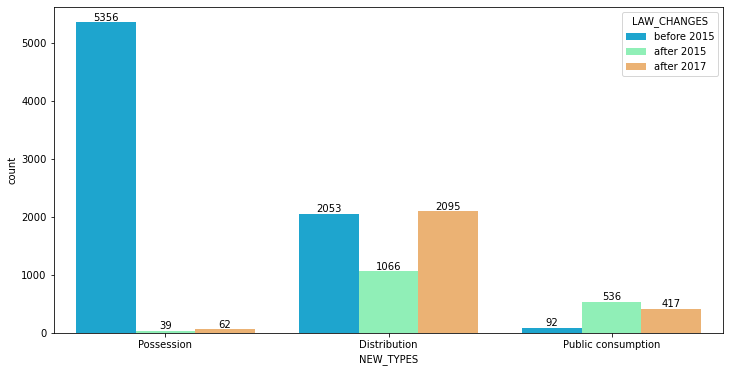

In [37]:
#law_changes = df[df['YEAR']<2018]
#law_changes['LAW_CHANGING'] = np.where(law_changes['YEAR']<2015,'before 2015','after 2015')

df['LAW_CHANGES'] = df['YEAR'].apply(lambda x: 'before 2015' if x<2015 else ('after 2015' if x < 2018 else ('after 2017' )))


plt.figure(figsize=(12,6))
ax=sns.countplot(data=df,x='NEW_TYPES',hue='LAW_CHANGES',palette='rainbow')
for container in ax.containers:
    ax.bar_label(container)

Let's identify which police offices within the leading districts (7D, 6D, 3D) recorded more offenses in the 
* three years before (2012-2014), 
* three years after (2015-2017)

the change in the law and

* after 2017 (2018-2021).

[Text(0.5, 1.0, '3D')]

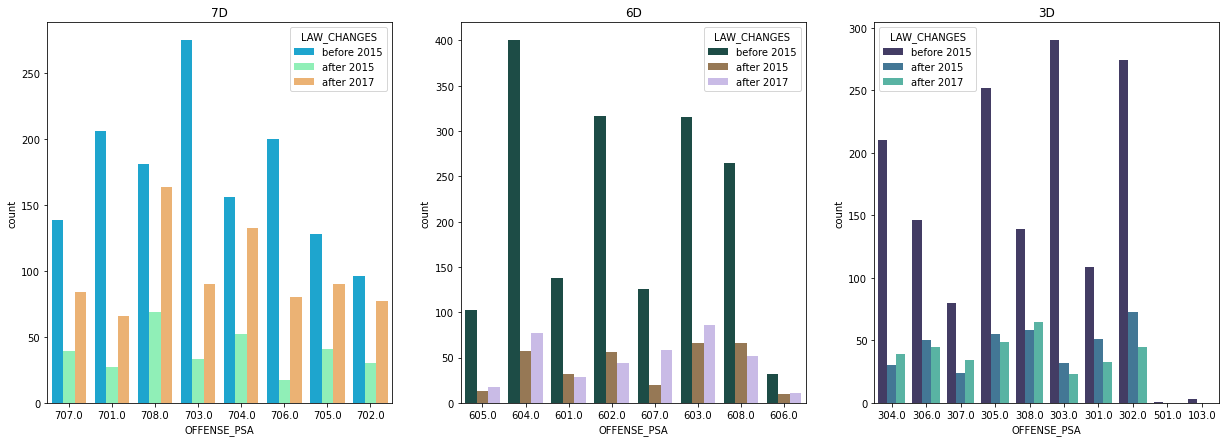

In [38]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(21, 7)

sns.countplot(data=df[df['OFFENSE_DISTRICT']=='7D'],x='OFFENSE_PSA',hue='LAW_CHANGES',palette='rainbow',ax=ax[0]).set(title='7D')
sns.countplot(data=df[df['OFFENSE_DISTRICT']=='6D'],x='OFFENSE_PSA',hue='LAW_CHANGES',palette='cubehelix',ax=ax[1]).set(title='6D')
sns.countplot(data=df[df['OFFENSE_DISTRICT']=='3D'],x='OFFENSE_PSA',hue='LAW_CHANGES',palette='mako',ax=ax[2]).set(title='3D')


### 3). The most common time for arrests.
#### All arrests types

It would be more convenient to work with separate dataframes for months, days of the week, and times. Let's create these dataframes for generating heatmaps.

In [39]:
#DAYS 
dmap = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DAY_OF_WEEK'] = df['DATETIME'].dt.dayofweek
#df['DAY_OF_WEEK'] = pd.Categorical(df['DAY_OF_WEEK'], categories=range(7), ordered=True)


#MONTHS
months = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['MONTH'] = df['DATETIME'].dt.month_name().str[:3]
df['MONTH'] = pd.Categorical(df['MONTH'], categories=months, ordered=True)



#DataFrames

DayMonth = df.groupby(by=['DAY_OF_WEEK','MONTH']).count()['TYPE'].unstack()
dictmap = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
DayMonth = DayMonth.rename(index=dictmap)

YearMonth = df.groupby(by=['MONTH','YEAR']).count()['TYPE'].unstack()

In [40]:
DayMonth

MONTH,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
DAY_OF_WEEK,,,,,,,,,,,,
Monday,81,74,78,86,82,63,83,62,52,48,55,50
Tuesday,119,77,147,130,132,161,154,100,87,111,78,92
Wednesday,165,157,168,167,237,177,180,140,120,145,128,133
Thursday,187,182,177,183,208,205,154,195,159,148,122,129
Friday,176,186,200,178,249,196,133,177,185,146,140,117
Saturday,163,191,229,196,247,226,178,172,123,147,145,159
Sunday,93,149,157,109,124,117,116,88,83,75,79,99


<AxesSubplot:xlabel='MONTH', ylabel='DAY_OF_WEEK'>

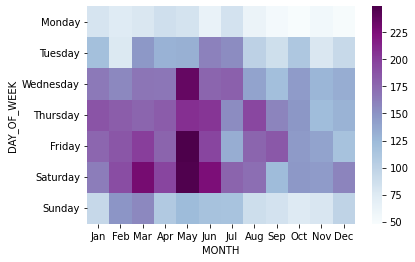

In [41]:
sns.heatmap(DayMonth,cmap="BuPu")

In [42]:
YearMonth

YEAR,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
MONTH,,,,,,,,,,
Jan,253,186,228,18,12,29,90,70,72,26
Feb,243,180,214,33,23,66,98,73,62,24
Mar,287,217,279,20,46,76,87,73,41,30
Apr,288,177,252,20,45,77,82,64,18,26
May,381,204,325,11,51,85,55,77,72,18
Jun,252,199,325,23,58,68,146,45,14,15
Jul,273,265,152,31,55,48,60,68,10,36
Aug,266,232,49,30,57,77,80,77,40,26
Sep,220,190,45,21,55,55,109,59,23,32


<AxesSubplot:xlabel='YEAR', ylabel='MONTH'>

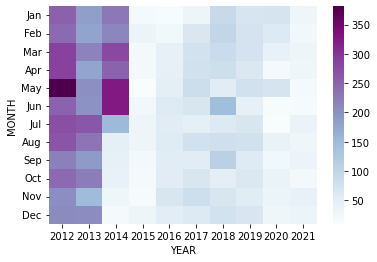

In [43]:
sns.heatmap(YearMonth,cmap="BuPu")

#### Different types of arrests

In [44]:
Month_arr = df.groupby(by=['MONTH','NEW_TYPES']).count()['CCN'].unstack()
Day_arr = df.groupby(by=['DAY_OF_WEEK','NEW_TYPES']).count()['CCN'].unstack()
Day_arr = Day_arr.rename(index=dictmap)

<AxesSubplot:xlabel='NEW_TYPES', ylabel='DAY_OF_WEEK'>

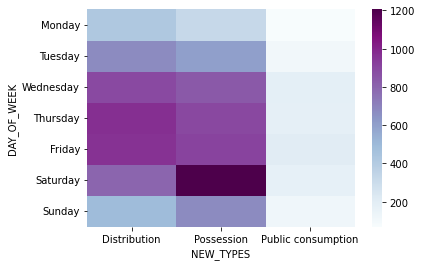

In [45]:
sns.heatmap(Day_arr,cmap="BuPu")

<AxesSubplot:xlabel='NEW_TYPES', ylabel='MONTH'>

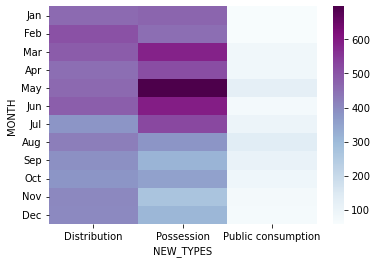

In [46]:
sns.heatmap(Month_arr,cmap="BuPu")

### 4).The word frequency within arrest descriptions.

In [47]:
df['DESCRIPTION'].value_counts()

Ucsa Possession Marijuana                                                     3644
Ucsa Poss Marijuana                                                           1720
Ucsa Pwid Marijuana                                                           1665
Distribution Of Marijuana-misd                                                1097
Poss W/i To Dist Marijuana-misd                                                815
Poss W/i To Dist Marijuana-fel                                                 628
Poss W/i To Dist A Controlled Substance                                        493
Consumption of marijuana in public space prohibited; impairment prohibited     489
Consumption of marijuana in public space prohibited                            417
Ucsa Distributing Marijuana                                                    250
Distribution Of A Controlled Substance                                         170
Public Consumption Of Marijuana                                                138
Poss

Let's analyze which words policemen commonly use in descriptions related to offenses.

In [48]:
# Create a list

sentense = []
words = []

for desc in df['DESCRIPTION'].str.split():
    sentense.append(desc)
    for li in sentense:
        for word in li:
            words.append(word.lower())

# Count of words without articles
ignore = {'the','a','if','in','it','of','or','to','and','i,ii','iii,iv,v','iii,iv,v','W'}
count_words = Counter(x for x in words if x not in ignore)

print(count_words)

Counter({'marijuana': 61614478, 'ucsa': 58705360, 'possession': 28537766, 'poss': 18796478, 'pwid': 13243631, 'dist': 4477543, 'marijuana-misd': 4148655, 'w/i': 3898735, 'distribution': 2918573, 'public': 2829622, 'consumption': 2829622, 'space': 2241099, 'prohibited': 2241099, 'distributing': 1682377, 'prohibited;': 1651202, 'impairment': 1651202, 'substance': 1599164, 'controlled': 1591249, 'marijuana-fel': 1249008, '-misd': 128192, 'csa': 92984, '-felony': 39330, 'conspiracy': 21751, 'distribute': 21751, 'other': 16189, 'schedule': 15830, 'manufacture': 13712, 'possess': 11951, 'cocaine/crack': 8234, 'cocaine': 8234, 'control': 7915, 'narcotics': 7915, 'manufacture,': 6990, 'distribute,': 6990, 'dispense,': 6990, 'possessing': 6856, 'w/intent': 6856, 'manufacture/possession/distrib-controlled': 2458, 'subs': 2458})


**Some abbreviations:**

* UCSA - “Uniform Controlled Substances Act”,

* w/i - within,

*  PWID - People who inject drugs,

* marijuana-misd - Misdemeanors (they are generally less serious offenses than felonies). 

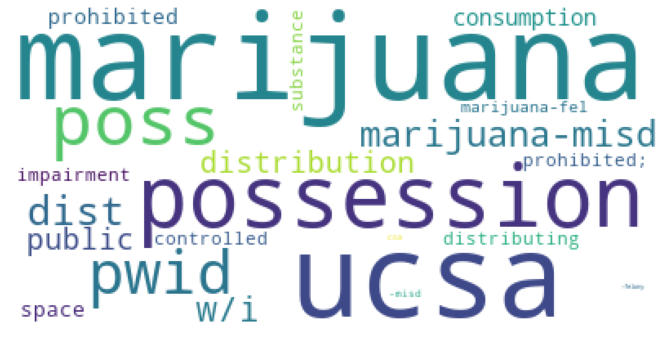

<Figure size 1440x1440 with 0 Axes>

In [49]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white",                      
                      max_words=100,collocations=False,
                      stopwords = STOPWORDS).generate_from_frequencies(count_words)

# Display the generated image:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(20,20))
plt.show()

Let's create a DataFrame to be shure that our wordcloud is correct:

In [55]:
count_words_df = pd.DataFrame([count_words])
count_words_df = pd.DataFrame.transpose(count_words_df)

count_words_df.columns = ['number']
count_words_df.reset_index(inplace=True)
count_words_df.rename(columns = {'index':'word'}, inplace = True)

count_words_df=count_words_df.sort_values('number',ascending=False)
count_words_df

,word,number
2,marijuana,61614478
0,ucsa,58705360
1,possession,28537766
5,poss,18796478
3,pwid,13243631
8,dist,4477543
10,marijuana-misd,4148655
9,w/i,3898735
12,distribution,2918573
14,public,2829622


## CONCLUSIONS

1. The districts 3D, 6D, and 7D are the leaders in terms of overall arrests. Specifically, 6D and 7D stand out as leaders in distribution-related offenses. However, when it comes to marijuana possession, the most frequently occurring districts are 3D and 6D.  
2. In general, it can be observed that the possession of a small amount of marijuana was very frequent, with rare instances where arrested individuals had a significant quantity. Possession of a small amount of marijuana became legal after 2014. 
3. In the three years following the law changes, there was no increase in the number of arrests in any of the leading districts, when compared to the three years prior to the law changes.
4. The decreasing trend was consistent for individual police offices within each of the leading districts.
5. In most cases Black people were arrested most often. It is logically understandable because in Washington, D.C., approximately 46% of the population is Black, given the city's historical and demographic characteristics (based on data from the U.S. Census Bureau, 2021).
6. Men are frequently involved in the distribution, possession, and consumption of marijuana then women.
7. By analyzing the heatmaps, we can observe that the highest number of arrests occurs during the month of May and in the latter half of the week. Interestingly, Monday stands out as the least active day of the week in terms of arrests.
8. Analyzing the heatmaps based on the type of arrest, it becomes evident that the possession of marijuana follows a seasonal pattern, peaking from March to July.
9. The most frequent words and abbreviations in arrest descriptions are:
* marijuana
* ucsa (“Uniform Controlled Substances Act”)
* possession
* poss
* pwid (People who inject drugs)
* dist
* marijuana-misd (Misdemeanors - they are generally less serious offenses than felonies)
* w/i (within)
* distribution
* public